In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly_express as px
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('listings.csv')
df['host_is_superhost']=df['host_is_superhost'].replace({'t':'superhost','f':'regularhost'})
df['host_since'] = pd.to_datetime(df['host_since'])
df['year'] = df['host_since'].dt.year
df['occupancy_rate'] = ((365 - df['availability_365']) / 365) * 100
df.to_excel('listings.xlsx')

In [4]:
df['calculated_host_listings_count'].sum()

6091.0

In [4]:
df.head()


,Unnamed: 0,id,scrape_id,last_scraped,source,name,host_id,host_since,host_acceptance_rate,host_is_superhost,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,year,occupancy_rate
0,0,397657.0,2.024063e+13,2024-06-29,city scrape,Charming apartment in central Oslo,1986686.0,2012-03-22,71.0,regularhost,...,21.0,4.0,0.0,f,1.0,1.0,0.0,0.0,2012,95.890411
1,1,503782.0,2.024063e+13,2024-06-30,city scrape,Central Grünerløkka,2484478.0,2012-05-28,100.0,superhost,...,28.0,10.0,0.0,f,1.0,1.0,0.0,0.0,2012,92.876712
2,2,613873.0,2.024063e+13,2024-06-30,city scrape,Loft in a stable,1272535.0,2011-10-10,43.0,regularhost,...,25.0,5.0,1.0,f,1.0,1.0,0.0,0.0,2011,18.356164
3,3,724117.0,2.024063e+13,2024-06-29,city scrape,Central Oslo / St. Hanshaugen / Quiet / Cosy,2425978.0,2012-05-21,33.0,regularhost,...,2.0,2.0,0.0,f,1.0,1.0,0.0,0.0,2012,46.575342
4,4,869173.0,2.024063e+13,2024-06-29,city scrape,Bright 72 m2 apartment with amazing views,4578764.0,2013-01-03,100.0,regularhost,...,16.0,3.0,0.0,f,1.0,1.0,0.0,0.0,2013,1.917808


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6053 entries, 0 to 6052
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Unnamed: 0                                    6053 non-null   int64         
 1   id                                            6053 non-null   float64       
 2   scrape_id                                     6053 non-null   float64       
 3   last_scraped                                  6053 non-null   object        
 4   source                                        6053 non-null   object        
 5   name                                          6053 non-null   object        
 6   host_id                                       6053 non-null   float64       
 7   host_since                                    6053 non-null   datetime64[ns]
 8   host_acceptance_rate                          6053 non-null   float6

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,6053.0,NaN,NaN,NaN,3026.0,0.0,1513.0,3026.0,4539.0,6052.0,1747.494921
id,6053.0,NaN,NaN,NaN,769317794269834240.0,397657.0,649256575519392768.0,907884533468562048.0,1084154775520294784.0,1189091774066713600.0,402652845374784576.0
scrape_id,6053.0,NaN,NaN,NaN,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0,20240629155744.0,0.0
last_scraped,6053,2,2024-06-29,4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,6053,2,city scrape,5274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6053,5631,Koselig og sentral leilighet,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,6053.0,NaN,NaN,NaN,174276974.548984,46476.0,36082615.0,94311285.0,267013217.0,586014915.0,177974230.203736
host_since,6053,NaN,NaN,NaN,2017-08-18 10:16:52.258384384,2009-10-17 00:00:00,2015-06-22 00:00:00,2016-09-12 00:00:00,2019-06-10 00:00:00,2024-06-27 00:00:00,NaN
host_acceptance_rate,6053.0,NaN,NaN,NaN,62.935569,0.0,43.0,67.0,94.0,100.0,32.524206
host_is_superhost,6053,2,regularhost,5451,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

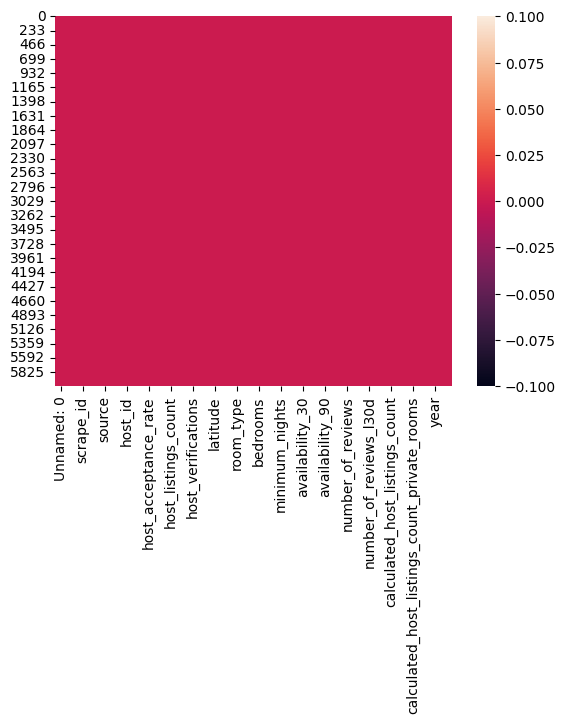

In [7]:
sns.heatmap(df.isnull())

# Evolucion de la cantidad de airbnbs a lo largo de los años

In [8]:
evolution_per_year = df.groupby('year')['calculated_host_listings_count'].sum().reset_index()

# Crear la figura
fig = go.Figure()

# Añadir el gráfico de barras
fig.add_trace(go.Bar(
    x=evolution_per_year['year'],
    y=evolution_per_year['calculated_host_listings_count'],
    name='Cantidad total de listings',
    opacity=0.7
))

# Añadir la línea de evolución
fig.add_trace(go.Scatter(
    x=evolution_per_year['year'],
    y=evolution_per_year['calculated_host_listings_count'],
    mode='lines+markers',
    name='Evolución',
    line=dict(color='red', width=2),
    marker=dict(symbol='x', size=8)
))

# Configurar título y ejes
fig.update_layout(
    title='Evolución de la cantidad de Airbnbs a lo largo de los años',
    xaxis_title='Año',
    yaxis_title='Cantidad de Airbnbs',
    legend=dict(x=0.1, y=0.9),
)

fig.show()


In [9]:
import folium
from folium.plugins import HeatMap

# Calcular el precio promedio y tasa de ocupación por vecindario
agg_data = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'availability_365': lambda x: (x.sum() / len(x)) * 100  # Tasa de ocupación como porcentaje
}).reset_index()

# Renombrar columnas para facilitar el trabajo
agg_data.columns = ['neighbourhood', 'avg_price', 'occupancy_rate']

# Ordenar los vecindarios según el precio medio
agg_data = agg_data.sort_values('avg_price', ascending=False)

# Identificar los 5 vecindarios más caros, más baratos y el resto
top_5_expensive = agg_data.head(5)
top_5_cheap = agg_data.tail(5)

# Crear una columna para asignar los colores
def get_color(neighbourhood):
    if neighbourhood in top_5_expensive['neighbourhood'].values:
        return 'red'  # Color para los 5 más caros
    elif neighbourhood in top_5_cheap['neighbourhood'].values:
        return 'blue'  # Color para los 5 más baratos
    else:
        return 'green'  # Color para el resto

# Crear el mapa base
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Añadir capa de mapa de calor
HeatMap(data=df[['latitude', 'longitude', 'price']].values, radius=10, max_zoom=13).add_to(mapa)

# Añadir marcadores con etiquetas para cada vecindario
for _, row in agg_data.iterrows():
    # Obtener las coordenadas aproximadas del vecindario (media de latitud y longitud)
    neigh_data = df[df['neighbourhood'] == row['neighbourhood']]
    lat = neigh_data['latitude'].mean()
    lon = neigh_data['longitude'].mean()

    # Obtener el color para el marcador
    color = get_color(row['neighbourhood'])

    # Crear el marcador en el mapa
    folium.CircleMarker(
        location=(lat, lon),
        radius=7,  # Tamaño del marcador
        color=color,
        fill=True,
        fill_opacity=0.7,
        tooltip=(f"<b>Vecindario:</b> {row['neighbourhood']}<br>"
                 f"<b>Precio Medio:</b> ${row['avg_price']:.2f}<br>"
                 f"<b>Tasa de Ocupación:</b> {row['occupancy_rate']:.2f}%")
    ).add_to(mapa)

# Guardar y mostrar el mapa
mapa.save("mapa_calor_con_aggregados_y_colores.html")
mapa

In [11]:
# Calcular el precio promedio por vecindario
neighbourhood_prices = df.groupby('neighbourhood')['price'].mean().reset_index()

# Ordenar por precio medio
neighbourhood_prices = neighbourhood_prices.sort_values('price', ascending=False)

# Crear gráfico de barras interactivo
fig = px.bar(neighbourhood_prices, x='neighbourhood', y='price', 
             title='Precio Medio por Vecindario', 
             labels={'neighbourhood': 'Vecindario', 'price': 'Precio Medio ($)'},
             color='price', 
             color_continuous_scale='Viridis')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [12]:
import folium
from folium.plugins import HeatMap

# Crear un mapa base
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)

# Añadir capa de mapa de calor basada en el precio
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]

HeatMap(heat_data, radius=10).add_to(mapa)
mapa


In [13]:
fig = px.scatter(df, x='accommodates', y='price', 
                 color='room_type', 
                 title='Relación entre Capacidad y Precio', 
                 labels={'accommodates': 'Capacidad (Nº de Huéspedes)', 'price': 'Precio ($)'},
                 hover_data=['name'])

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


In [14]:
# Crear columna 'host_type'
df['host_type'] = df['host_is_superhost'].replace({'t': 'Superhost', 'f': 'Regular Host'})

# Agrupar por tipo de host y calcular precio medio
superhost_prices = df.groupby('host_type')['price'].mean().reset_index()

# Crear gráfico de barras
fig = px.bar(superhost_prices, x='host_type', y='price', 
             title='Precio Medio: Superhost vs Regular Host',
             labels={'host_type': 'Tipo de Host', 'price': 'Precio Medio ($)'}, 
             color='host_type')
fig.show()


In [17]:
fig = px.scatter(df, x='number_of_reviews', y='price', 
                 title='Relación entre Número de Reseñas y Precio',
                 labels={'number_of_reviews': 'Número de Reseñas', 'price': 'Precio ($)'},
                 hover_data=['name'])

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


In [18]:
fig = px.scatter(df, x='bedrooms', y='price',  
                 title='Relación entre Número de Dormitorios y Precio',
                 labels={'bedrooms': 'Número de Dormitorios', 'price': 'Precio ($)', 'bathrooms_text': 'Baños'})

fig.update_traces(marker=dict(size=10, opacity=0.6))
fig.show()


In [19]:
fig = px.scatter(
    df, 
    x='accommodates', 
    y='price', 
    color='neighbourhood', 
    title="Relación entre capacidad y precio", 
    labels={'accommodates': 'Capacidad', 'price': 'Precio'}
)
fig.show()


In [20]:
fig = px.bar(
    df, 
    x='accommodates', 
    y='price', 
    title="Distribución del precio por capacidad de alojamiento"
)
fig.show()

In [18]:
fig = px.scatter(
    df, 
    x='number_of_reviews', 
    y='price', 
    color='host_is_superhost',
    title="Número de reseñas vs Precio", 
    labels={'number_of_reviews': 'Número de Reseñas', 'price': 'Precio'}
)
fig.show()


# Tasa de ocupacion 

(365-availability_365/365)*100

In [24]:
df['occupancy_rate'] = ((365 - df['availability_365']) / 365) * 100


In [25]:
import plotly.express as px

agg_data = df.groupby('neighbourhood')['occupancy_rate'].mean().reset_index().sort_values(ascending=False,by='occupancy_rate')
fig = px.bar(agg_data, x='neighbourhood', y='occupancy_rate', title='Tasa de Ocupación por Vecindario')
fig.show()


In [26]:
fig = px.scatter(df, x='price', y='occupancy_rate', 
                 title='Relación entre Precio y Tasa de Ocupación',
                 color='neighbourhood', 
                 labels={'price': 'Precio', 'occupancy_rate': 'Tasa de Ocupación (%)'})
fig.show()



In [27]:
fig = px.box(df, x='host_is_superhost', y='occupancy_rate', 
             title='Tasa de Ocupación: Superhost vs Host Regular', 
             labels={'superhost': 'Tipo de Host', 'occupancy_rate': 'Tasa de Ocupación (%)'})
fig.show()


In [29]:
fig = px.scatter(df, x='number_of_reviews', y='occupancy_rate', 
                 title='Número de Reseñas vs Tasa de Ocupación', 
                 labels={'number_of_reviews': 'Número de Reseñas', 'occupancy_rate': 'Tasa de Ocupación (%)'})
fig.show()


In [21]:
df['longitude'].dtype

dtype('float64')

In [37]:
# Agrupar datos por vecindario
agg_data = df.groupby('neighbourhood').agg({
    'price': 'mean',
    'latitude': 'mean',
    'longitude': 'mean',
    'availability_365': lambda x: (x.sum() / len(x)) * 100  # Tasa de ocupación como porcentaje
}).reset_index()

# Crear un mapa base
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Añadir capa de mapa de calor con los datos de latitud, longitud y precio
HeatMap(data=df[['latitude', 'longitude', 'price']].values, radius=15, max_zoom=13).add_to(mapa)

# Añadir marcadores con los nombres de los vecindarios y su precio medio
for _, row in agg_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"<b>Vecindario:</b> {row['neighbourhood']}<br><b>Precio Medio:</b> ${row['price']:.2f}<br><b>Tasa de Ocupación:</b> {row['availability_365']:.2f}%", 
                          parse_html=True),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)


fig.show()